<a href="https://colab.research.google.com/github/Hteam121/citruscode-hacksmu-final/blob/main/OfficeSMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

# Initialize Faker
fake = Faker()

# Number of records to generate
n = 1000

# Asset Types for an office building (with likelihood of occurrence)
asset_types = ['Desktop Computer'] * 30 + ['Laptop'] * 30 + ['Printer'] * 10 + ['Projector'] * 5 + ['Coffee Machine'] * 5 + ['Air Conditioner'] * 10 + ['Conference Phone'] * 5 + ['Scanner'] * 5

# Manufacturers
manufacturers = ['Manufacturer_X', 'Manufacturer_Y', 'Manufacturer_Z', 'Manufacturer_W']

# Floors
floors = list(range(1, 11))

# Rooms (now representing office rooms or areas)
rooms = list(range(100, 200))

# Create an empty DataFrame to store the asset data
df = pd.DataFrame(columns=['Asset ID', 'Asset Type', 'Floor', 'Room', 'Installation Date', 'Manufacturer', 'Operational Time (hrs)', 'Work Orders', 'Repairs', 'Last Serviced Date', 'Health Index'])

# Populate the DataFrame with simulated data
for i in range(1, n + 1):
    asset_id = i
    asset_type = random.choice(asset_types)
    floor = random.choice(floors)
    room = random.choice(rooms)
    installation_date = fake.date_between(start_date='-5y', end_date='today')
    manufacturer = random.choice(manufacturers)

    # Adjusted operational time for specific assets
    if asset_type == 'Air Conditioner':
        operational_time = random.randint(2000, 10000)
    elif asset_type == 'Projector':
        operational_time = random.randint(100, 1000)
    else:
        operational_time = random.randint(500, 5000)

    work_orders = random.randint(0, 20 if asset_type == 'Air Conditioner' else 10)
    repairs = random.randint(0, 10 if asset_type == 'Air Conditioner' else 5)
    last_serviced_date = fake.date_between(start_date=installation_date, end_date='today')

    # Generate a health index; higher number means worse health (e.g., more likely to fail)
    health_index = random.randint(1, 100) if random.random() < 0.2 else random.randint(1, 50)

    df.loc[i - 1] = [asset_id, asset_type, floor, room, installation_date, manufacturer, operational_time, work_orders, repairs, last_serviced_date, health_index]

# Save the DataFrame to a CSV file
df.to_csv('office_assets.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


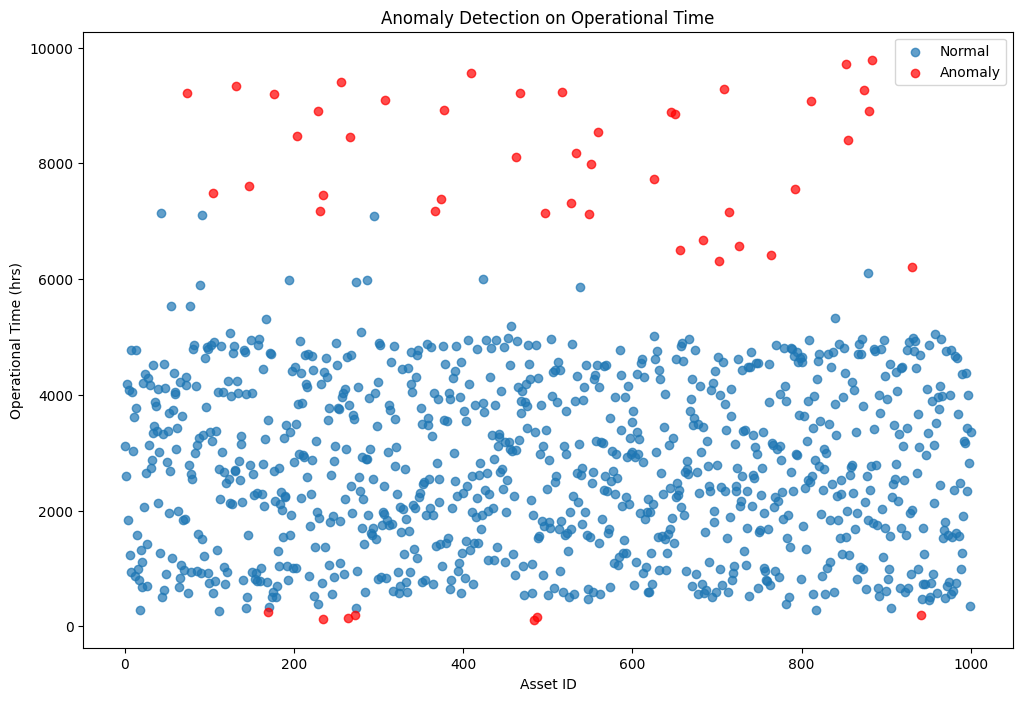

Anomalies in Operational Time:
     Asset ID  Operational Time (hrs)       Asset Type
73         74                    9218  Air Conditioner
103       104                    7488  Air Conditioner
131       132                    9336  Air Conditioner
146       147                    7611  Air Conditioner
168       169                     256        Projector
175       176                    9202  Air Conditioner
203       204                    8474  Air Conditioner
228       229                    8911  Air Conditioner
230       231                    7185  Air Conditioner
233       234                    7461  Air Conditioner
234       235                     127        Projector
255       256                    9408  Air Conditioner
263       264                     143        Projector
265       266                    8448  Air Conditioner
271       272                     192        Projector
307       308                    9093  Air Conditioner
366       367                    7

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Read the generated CSV file into a DataFrame
df = pd.read_csv('office_assets.csv')

# Using Isolation Forest for anomaly detection on 'Operational Time (hrs)'
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05)
df['Anomaly_OperationalTime'] = isolation_forest.fit_predict(df[['Operational Time (hrs)']])

# Separate the anomalies from the normal data
anomalies = df[df['Anomaly_OperationalTime'] == -1]
normal = df[df['Anomaly_OperationalTime'] == 1]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(normal['Asset ID'], normal['Operational Time (hrs)'], label='Normal', alpha=0.7)
plt.scatter(anomalies['Asset ID'], anomalies['Operational Time (hrs)'], label='Anomaly', c='r', alpha=0.7)
plt.xlabel('Asset ID')
plt.ylabel('Operational Time (hrs)')
plt.title('Anomaly Detection on Operational Time')
plt.legend()
plt.show()

# Display anomalies
print("Anomalies in Operational Time:")
print(anomalies[['Asset ID', 'Operational Time (hrs)', 'Asset Type']])


                                 SARIMAX Results                                  
Dep. Variable:     Operational Time (hrs)   No. Observations:                 1000
Model:                     ARIMA(5, 1, 0)   Log Likelihood               -8979.411
Date:                    Sun, 17 Sep 2023   AIC                          17970.821
Time:                            06:21:59   BIC                          18000.262
Sample:                                 0   HQIC                         17982.011
                                   - 1000                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8702      0.032    -26.832      0.000      -0.934      -0.807
ar.L2         -0.7079      0.040    -17.787      0.000      -0.786      -0.630
ar.L3         -0.534

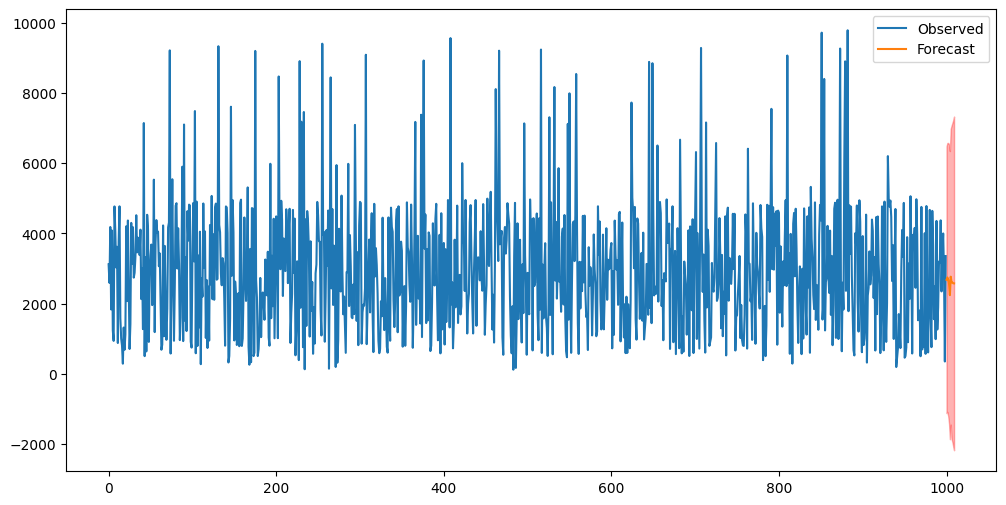

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create a time series from operational time data
time_series_data = df['Operational Time (hrs)']

# Fit the new ARIMA model
model = ARIMA(time_series_data, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make sure to import matplotlib.pyplot
import matplotlib.pyplot as plt

# Make forecast
future_steps = 10  # Number of steps to predict into the future
forecast_obj = model_fit.get_forecast(steps=future_steps)
forecast = forecast_obj.predicted_mean
stderr = forecast_obj.se_mean
conf_int = forecast_obj.conf_int(alpha=0.05)  # 95% conf

# Generate a new index for the forecast period
new_index = range(len(time_series_data), len(time_series_data) + future_steps)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data, label='Observed')
plt.plot(new_index, forecast, label='Forecast')
plt.fill_between(new_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='r', alpha=0.3)
plt.legend()
plt.show()



In [ ]:
import pandas as pd

df = pd.read_csv('office_assets.csv')

X = df[['Operational Time (hrs)', 'Repairs']]

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


print((df['Repairs'] > 5).value_counts())

y = df['Repairs'] > 2  # Adjust this condition according to your needs

# Then you can proceed to fit the model as before:
model.fit(X, y)

# Add the prediction to the DataFrame
df['Failure_Probability'] = model.predict_proba(X)[:, 1]

# Add a 'Predicted_Failure_Next_Month' column
threshold = 0.8
df['Predicted_Failure_Next_Month'] = (df['Failure_Probability'] > threshold).astype(int)

# Save to new CSV
df.to_csv('office_assets_with_predictions.csv', index=False)


False    950
True      50
Name: Repairs, dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv('office_assets_with_predictions.csv')
column_name = 'Predicted_Failure_Next_Month'  # Replace with the column name you are interested in

count_1 = (df[column_name] == 1).sum()
count_0 = (df[column_name] == 0).sum()

print(f"Count of 1's in {column_name}: {count_1}")
print(f"Count of 0's in {column_name}: {count_0}")

Count of 1's in Predicted_Failure_Next_Month: 524
Count of 0's in Predicted_Failure_Next_Month: 476


Average Failure Prediction by Asset Type: Asset Type
Coffee Machine      0.384615
Printer             0.414141
Desktop Computer    0.470032
Conference Phone    0.509804
Laptop              0.552448
Projector           0.576923
Scanner             0.681818
Air Conditioner     0.707071
Name: Predicted_Failure_Next_Month, dtype: float64


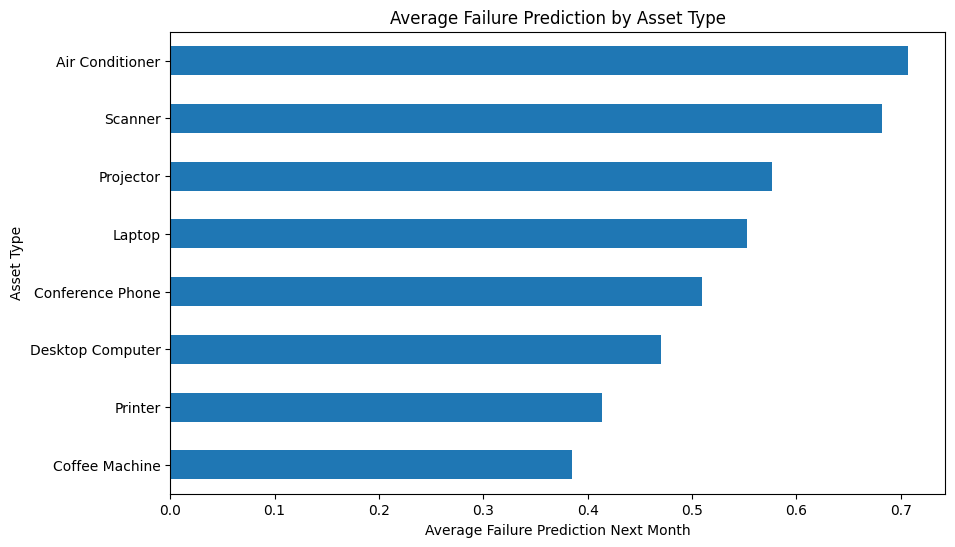

Average Failure Prediction by Manufacturer: Manufacturer
Manufacturer_X    0.476987
Manufacturer_Z    0.526316
Manufacturer_Y    0.531746
Manufacturer_W    0.557252
Name: Predicted_Failure_Next_Month, dtype: float64


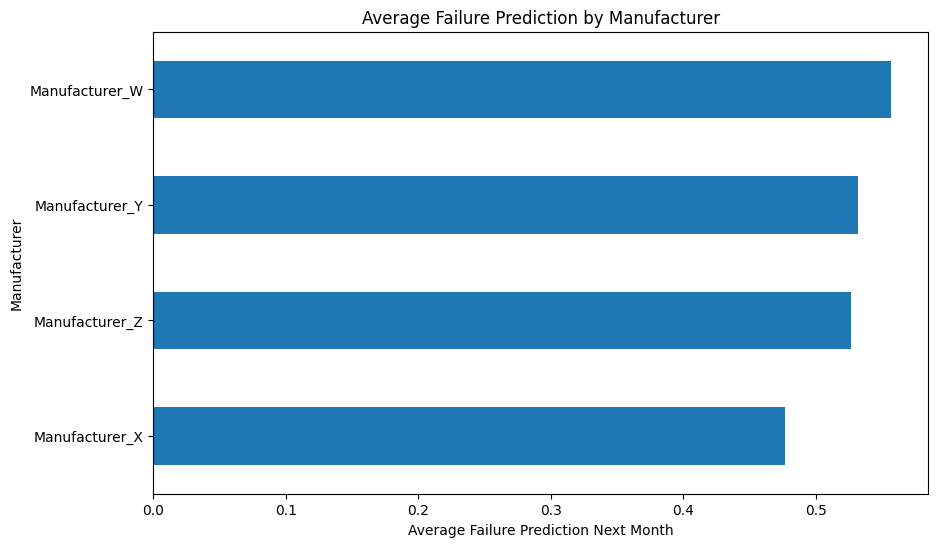

Average Failure Prediction by Floor: Floor
6     0.419355
10    0.435185
4     0.495050
1     0.509615
9     0.516129
7     0.546296
2     0.546392
5     0.554455
8     0.608696
3     0.611650
Name: Predicted_Failure_Next_Month, dtype: float64


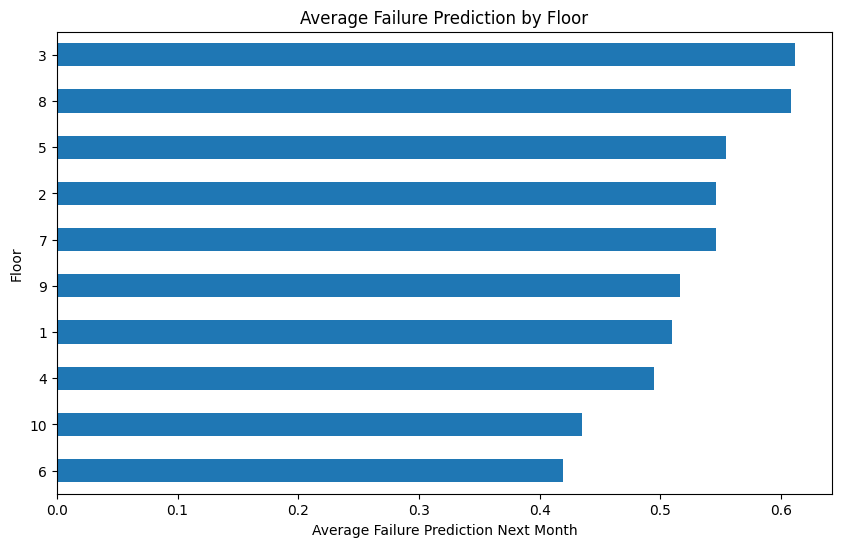

Number of Assets with Failure Probability >= 0.2: Asset Type
Coffee Machine       20
Conference Phone     26
Projector            30
Scanner              30
Printer              41
Air Conditioner      70
Desktop Computer    149
Laptop              158
dtype: int64


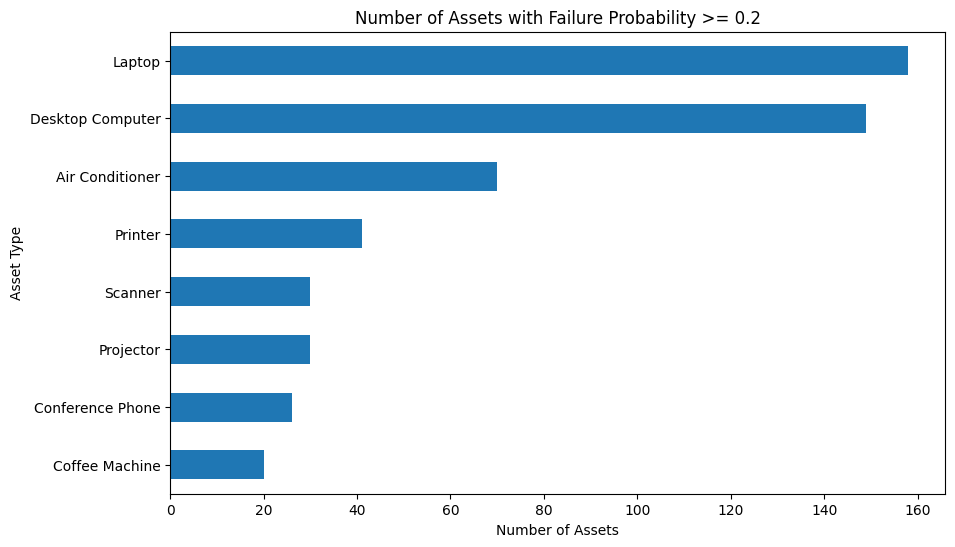

Number of Assets with Failure Probability >= 0.5: Asset Type
Coffee Machine       20
Conference Phone     26
Projector            30
Scanner              30
Printer              41
Air Conditioner      70
Desktop Computer    149
Laptop              158
dtype: int64


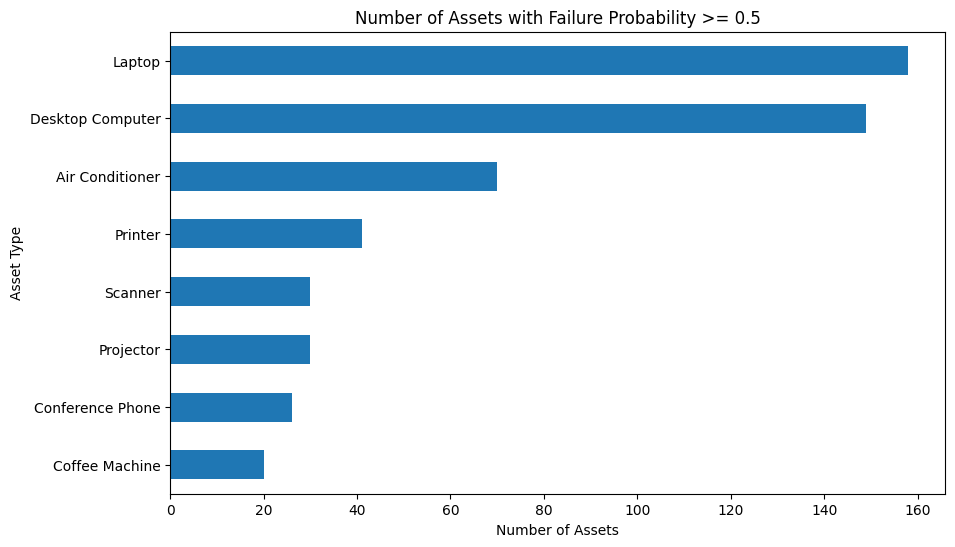

Number of Assets with Failure Probability >= 0.7: Asset Type
Coffee Machine       20
Conference Phone     26
Projector            30
Scanner              30
Printer              41
Air Conditioner      70
Desktop Computer    149
Laptop              158
dtype: int64


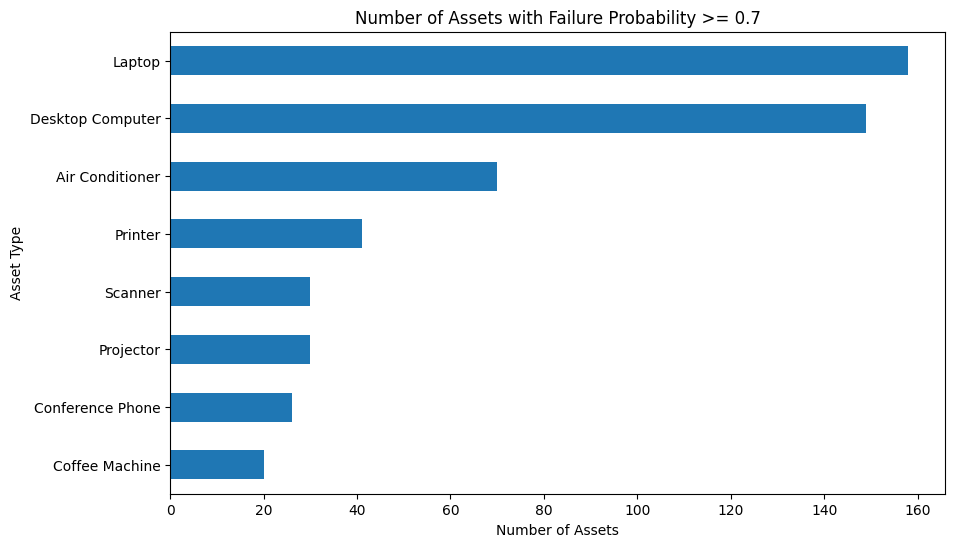

Number of Assets with Failure Probability >= 0.9: Asset Type
Coffee Machine       20
Conference Phone     26
Projector            30
Scanner              30
Printer              41
Air Conditioner      70
Desktop Computer    149
Laptop              158
dtype: int64


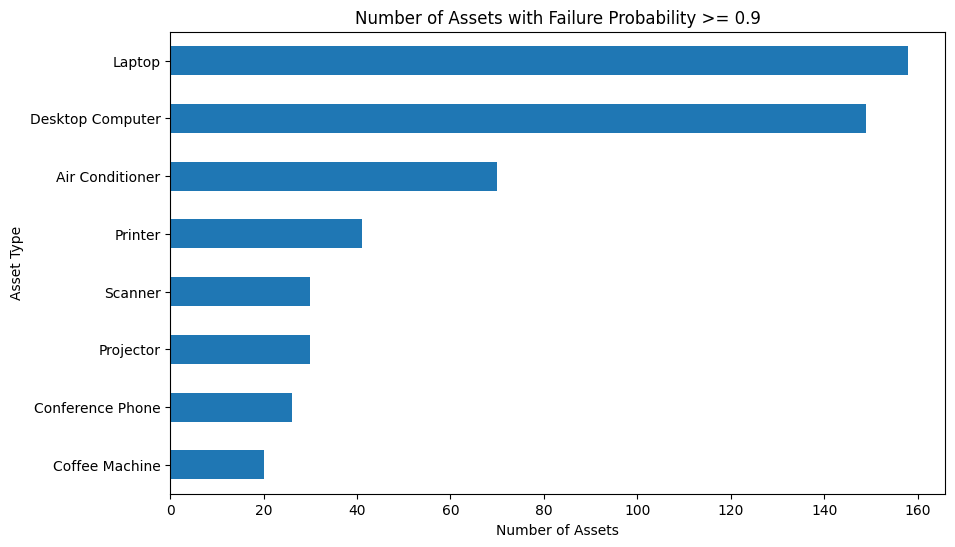

Number of Assets Installed Over Time: Installation Year
2018     55
2019    201
2020    213
2021    202
2022    207
2023    122
dtype: int64


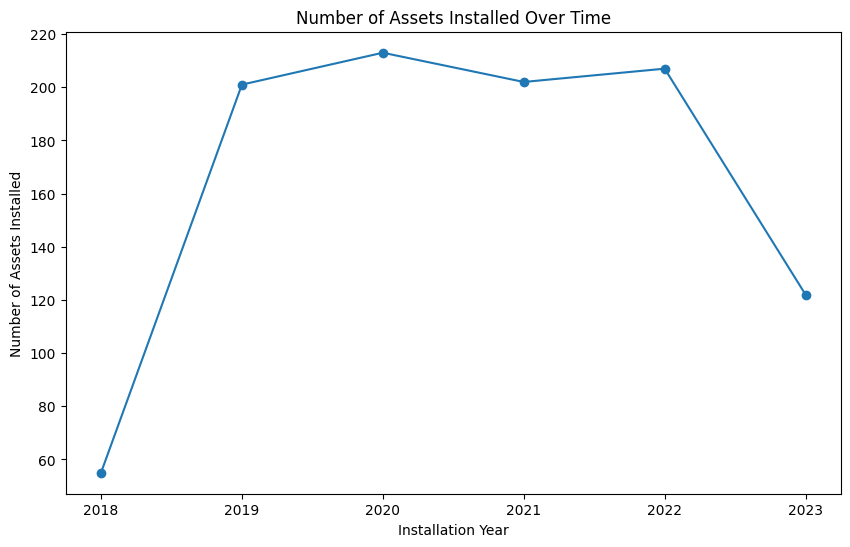

Top 5 assets that need fixing ASAP:      Asset ID        Asset Type  Floor  Predicted_Failure_Next_Month
999      1000  Desktop Computer      6                             1
780       781            Laptop     10                             1
778       779            Laptop      6                             1
428       429            Laptop     10                             1
429       430            Laptop      3                             1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('office_assets_with_predictions.csv')  # Assuming you have a CSV file named "hospital_assets_with_predictions.csv"

# Convert dates to pandas datetime objects
df['Installation Date'] = pd.to_datetime(df['Installation Date'])
df['Last Serviced Date'] = pd.to_datetime(df['Last Serviced Date'])

# Failure analysis by Asset Type
plt.figure(figsize=(10, 6))
asset_type_failure = df.groupby('Asset Type')['Predicted_Failure_Next_Month'].mean().sort_values()
print("Average Failure Prediction by Asset Type:", asset_type_failure)
asset_type_failure.plot(kind='barh')
plt.xlabel('Average Failure Prediction Next Month')
plt.title('Average Failure Prediction by Asset Type')
plt.show()

# Failure analysis by Manufacturer
plt.figure(figsize=(10, 6))
manufacturer_failure = df.groupby('Manufacturer')['Predicted_Failure_Next_Month'].mean().sort_values()
print("Average Failure Prediction by Manufacturer:", manufacturer_failure)
manufacturer_failure.plot(kind='barh')
plt.xlabel('Average Failure Prediction Next Month')
plt.title('Average Failure Prediction by Manufacturer')
plt.show()

# Failure analysis by Floor
plt.figure(figsize=(10, 6))
floor_failure = df.groupby('Floor')['Predicted_Failure_Next_Month'].mean().sort_values()
print("Average Failure Prediction by Floor:", floor_failure)
floor_failure.plot(kind='barh')
plt.xlabel('Average Failure Prediction Next Month')
plt.title('Average Failure Prediction by Floor')
plt.show()

# Dynamic threshold analysis for Failure Probability
thresholds = [0.2, 0.5, 0.7, 0.9]
for threshold in thresholds:
    plt.figure(figsize=(10, 6))
    df_high_risk = df[df['Failure_Probability'] >= threshold]
    high_risk_assets = df_high_risk.groupby('Asset Type').size().sort_values()
    print(f"Number of Assets with Failure Probability >= {threshold}:", high_risk_assets)
    high_risk_assets.plot(kind='barh')
    plt.xlabel('Number of Assets')
    plt.title(f'Number of Assets with Failure Probability >= {threshold}')
    plt.show()

# Time analysis for installations and last service
plt.figure(figsize=(10, 6))
df['Installation Year'] = df['Installation Date'].dt.year
installation_by_year = df.groupby('Installation Year').size()
print("Number of Assets Installed Over Time:", installation_by_year)
installation_by_year.plot(kind='line', marker='o')
plt.xlabel('Installation Year')
plt.ylabel('Number of Assets Installed')
plt.title('Number of Assets Installed Over Time')
plt.show()

# Top 5 assets that need fixing ASAP
top_5_assets = df.sort_values(by='Predicted_Failure_Next_Month', ascending=False).head(5)
print("Top 5 assets that need fixing ASAP:", top_5_assets[['Asset ID', 'Asset Type', 'Floor', 'Predicted_Failure_Next_Month']])
